In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #for waffle chart
mpl.style.use('ggplot') # optional: for ggplot-like style
import numpy as np
import pandas as pd
from PIL import Image #for waffle chart
import seaborn as sns
import wordcloud

In [30]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [31]:
df.set_index('Country',inplace=True)

Waffle Charts

In [32]:
df_dsn=df.loc[['Denmark','Sweden','Norway'],:]
total_values=df_dsn['Total'].sum()
category_proportions=df_dsn['Total']/total_values
pd.DataFrame(category_proportions)

,Total
Country,
Denmark,0.322557
Sweden,0.485034
Norway,0.192409


In [33]:
width=40
height=10
total_num_tiles=width*height

tiles_per_category=(category_proportions*total_num_tiles).round().astype(int)
pd.DataFrame(tiles_per_category)

,Total
Country,
Denmark,129
Sweden,194
Norway,77


In [34]:
waffle_chart=np.zeros((height,width),dtype=np.uint)
category_index=0
title_index=0

for col in range(width):
    for row in range(height):
        title_index+=1
        if title_index>sum(tiles_per_category[0:category_index]):
            category_index+=1
        waffle_chart[row,col]=category_index

waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

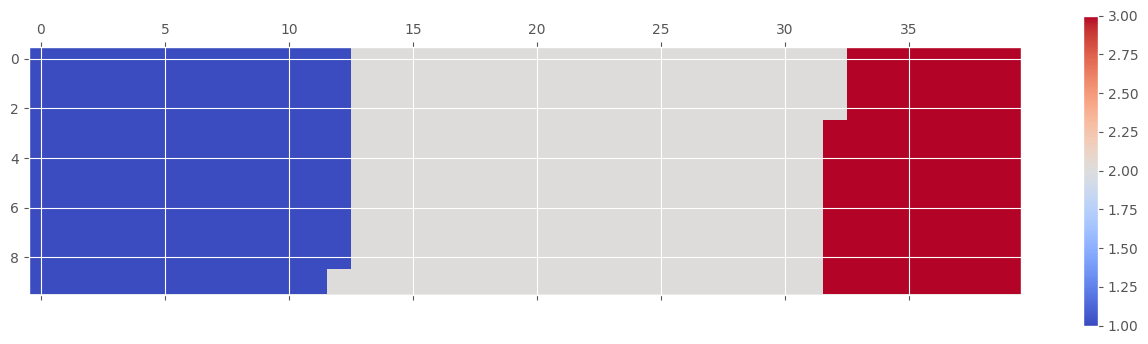

In [35]:
fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()
plt.show()

C:\Users\julie\AppData\Local\Temp\ipykernel_22840\1741604947.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values=values_cumsum[-1]


<Figure size 640x480 with 0 Axes>

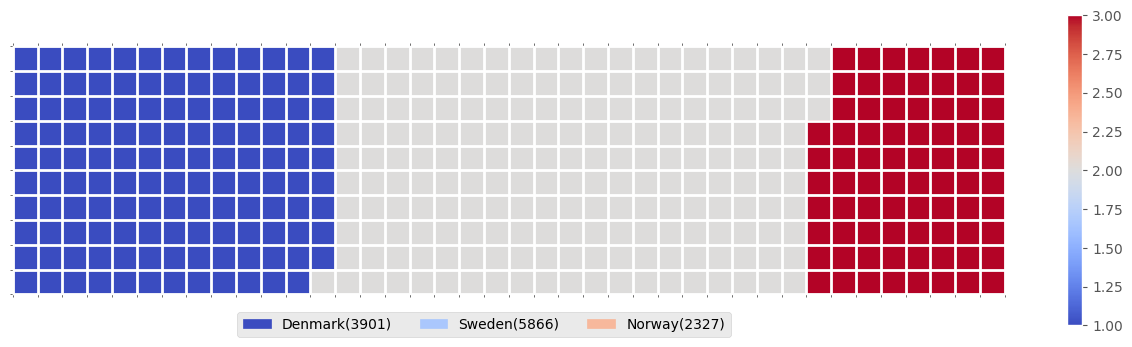

In [36]:
fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

ax=plt.gca() #get the axis
ax.set_xticks(np.arange(-.5,(width),1),minor=True)
ax.set_yticks(np.arange(-.5,(height),1),minor=True)
ax.grid(which='minor',color='w',linestyle='-',linewidth=2)
plt.xticks([])
plt.yticks([])

values_cumsum=np.cumsum(df_dsn['Total'])
total_values=values_cumsum[-1]

legend_handles=[]
for i,category in enumerate(df_dsn.index.values):
    label='{}({})'.format(category,df_dsn['Total'][category])
    color=colormap(i/len(df_dsn.index))
    legend_handles.append(mpatches.Patch(color=color,label=label))

plt.legend(handles=legend_handles,loc='lower center',ncol=len(df_dsn.index.values),bbox_to_anchor=(0.,-0.2,0.95,0.1))
plt.show()

In [37]:
from pywaffle import Waffle

fig=plt.figure(FigureClass=Waffle,
                rows=20, columns=30,
                values=df_dsn['Total'],
                cmap_name='tab20',
                legend={'labels':[f"{k}({v})" for k,v in zip(df_dsn.index.values,df_dns.Total)],'loc':'lower left','bbox_to_anchor':(0.,-0.1), 'ncol':3})
plt.show()

NameError: name 'df_dns' is not defined

Word clouds

In [18]:
from wordcloud import WordCloud, STOPWORDS
import urllib
import matplotlib as mpl
import matplotlib.pyplot as plt

alice_novel=urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode('utf-8')

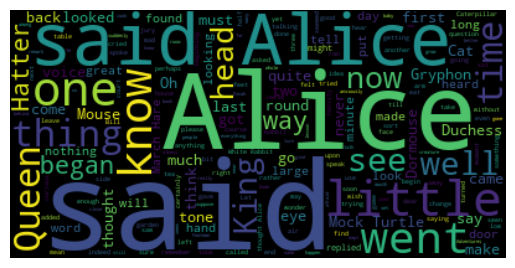

In [22]:
alice_wc=WordCloud()
alice_wc.generate(alice_novel)
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show() 

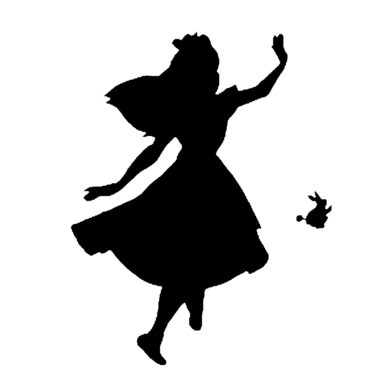

In [26]:
alice_mask=np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))
plt.imshow(alice_mask,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off')
plt.show()

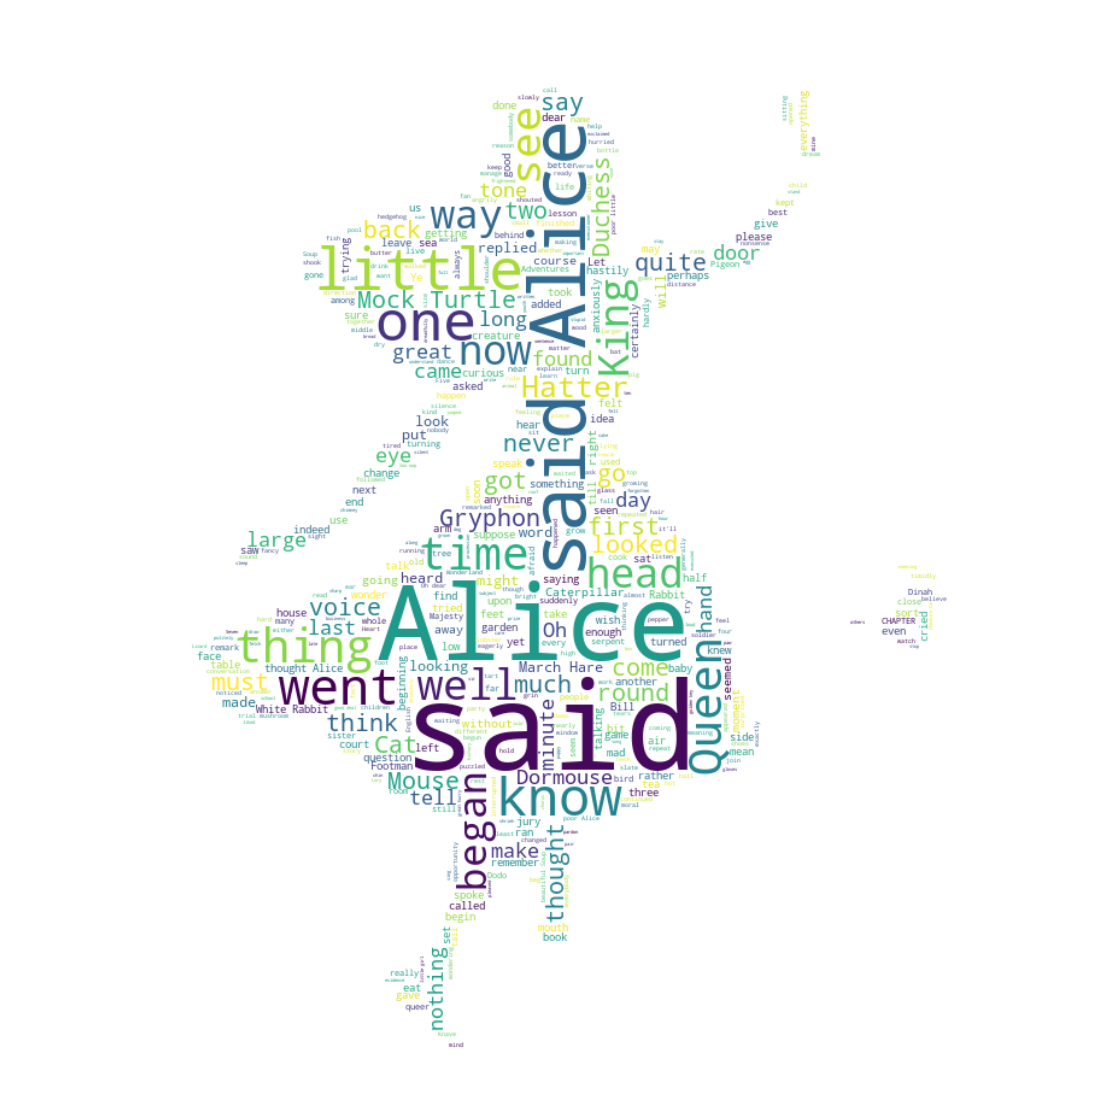

In [27]:
alice_wc=WordCloud(background_color='white',max_words=2000,mask=alice_mask,stopwords=STOPWORDS)
alice_wc.generate(alice_novel)
fig=plt.figure(figsize=(14,18))
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

Seaborn

<Axes: xlabel='count', ylabel='Continent'>

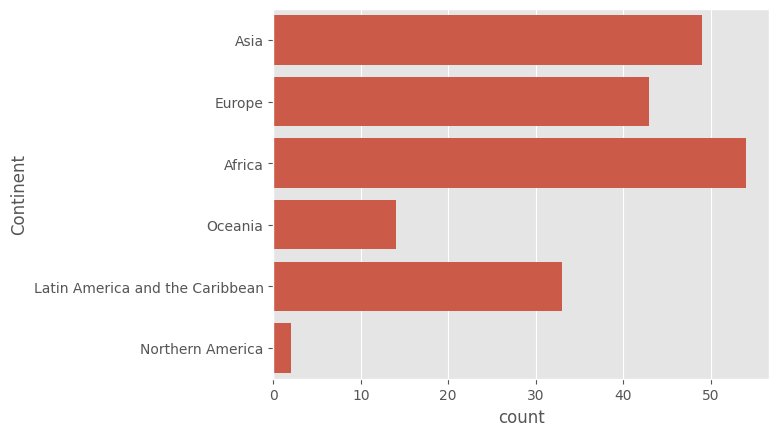

In [39]:
df['Continent'].unique()
sns.countplot(y='Continent',data=df)

In [40]:
years=list(map(str,range(1980,2014)))
df_tot=pd.DataFrame(df[years].sum(axis=0))
df_tot.index=map(int,df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns=['year','total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<Axes: xlabel='year', ylabel='total'>

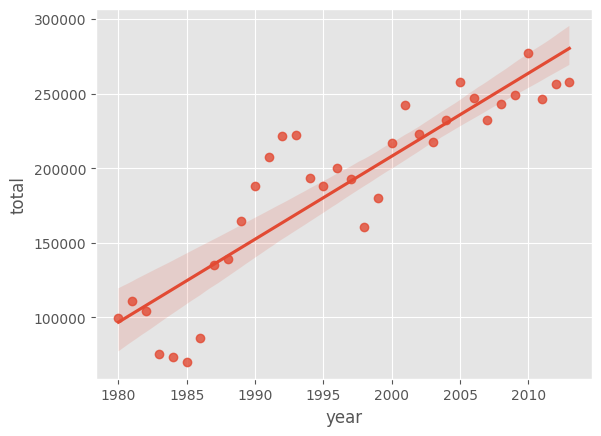

In [41]:
sns.regplot(x='year',y='total',data=df_tot)

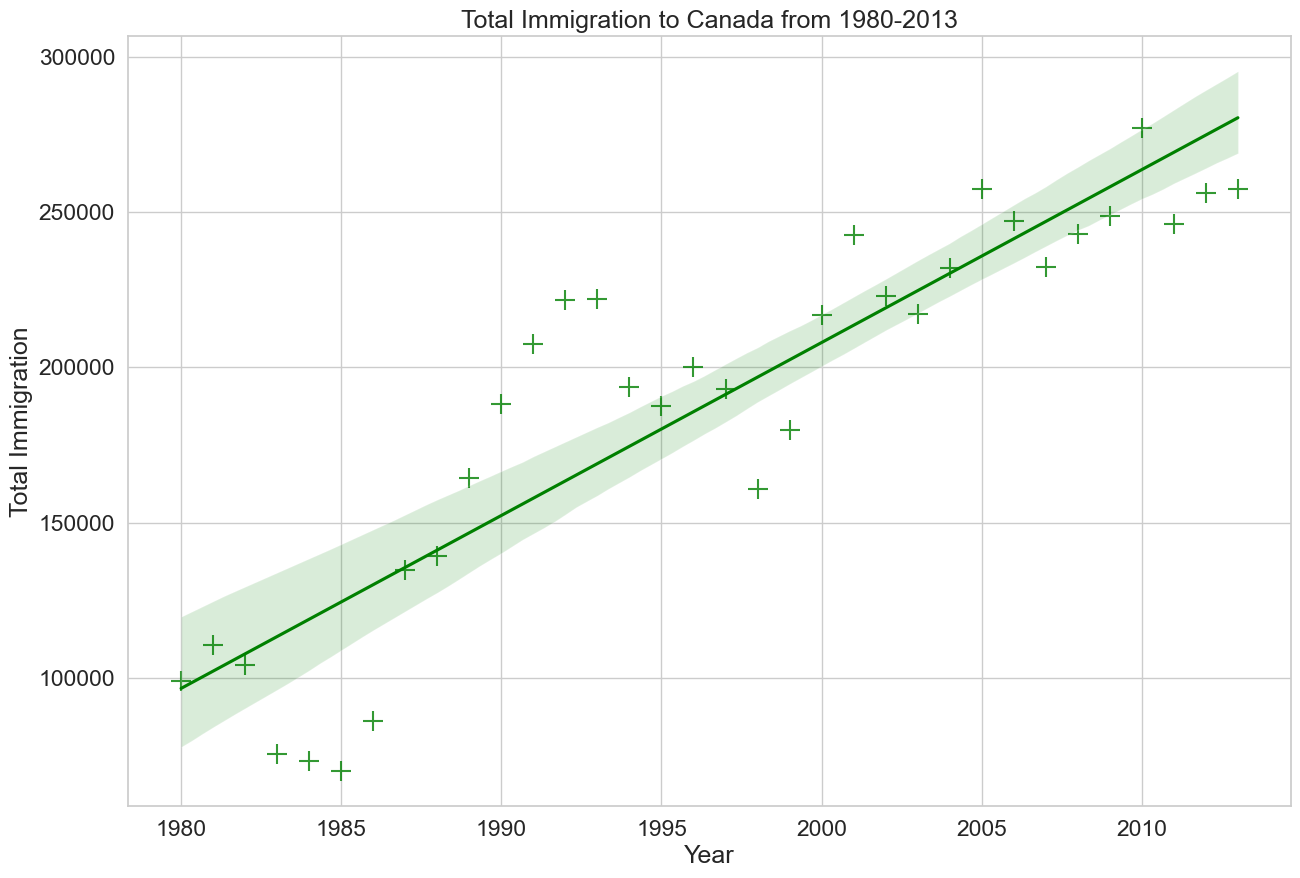

In [42]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax=sns.regplot(x='year',y='total',data=df_tot,color='green',marker='+',scatter_kws={'s':200})
ax.set(xlabel='Year',ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')
plt.show()
